# 1. Install and Import Required Libraries

In [1]:
# Install libraries if not already installed (uncomment if needed)
# !pip install pandas matplotlib seaborn scikit-learn

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


This step installs and imports all necessary Python libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and clustering (scikit-learn).

# 2. Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('cwurData.csv')

# Display the first few rows
df.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


This step loads the CWUR dataset and displays the first few rows so you can understand the structure of the data.

# 3. Clean and Prepare the Data

In [3]:
# Check the column names
df.columns

# Drop non-numerical columns (K-Means needs only numeric data)
df_cleaned = df.select_dtypes(include=[np.number])

# Check for missing values
df_cleaned.isnull().sum()


world_rank                0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

This step removes categorical (non-numeric) columns from the dataset and checks for missing values to prepare the data for clustering.

# UPDATED: 3. Clean and Prepare the Data

In [6]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Check for missing values
print("Missing values before cleaning:")
print(df_numeric.isnull().sum())

# Option 1: Drop rows with any missing values (safe and simple)
df_cleaned = df_numeric.dropna()

# Option 2: (Optional) Fill missing values instead of dropping
# df_cleaned = df_numeric.fillna(df_numeric.mean())

# Confirm cleaning
print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())


Missing values before cleaning:
world_rank                0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64
Missing values after cleaning:
world_rank              0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64


This step selects numeric data only and handles missing values. You can either drop rows with NaNs or fill them with the mean. After cleaning, there should be no NaNs before standardizing the data.

# 4. Standardize the Data

In [7]:
# Standardizing the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_cleaned.columns)
df_scaled.head()


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,-1.730320,-0.777042,-2.761099,-2.236277,-3.629116,-1.730459,-1.731998,-1.792802,-1.728091,-1.804285,8.033673,-1.0
1,-1.726856,-0.758326,-2.667502,-2.230457,-3.571853,-1.716599,-1.725059,-1.784804,-1.717633,-1.788874,7.895560,-1.0
2,-1.723391,-0.739610,-2.742379,-2.178080,-3.610028,-1.681949,-1.728529,-1.788803,-1.724605,-1.808137,7.834851,-1.0
3,-1.719927,-0.777042,-2.751739,-2.183900,-3.552765,-1.699274,-1.704243,-1.748816,-1.686257,-1.627062,7.675490,-1.0
4,-1.716463,-0.758326,-2.704941,-2.172261,-3.457326,-1.695809,-1.693835,-1.752814,-1.689743,-1.750347,7.655760,-1.0


This step standardizes the numeric data so that all variables contribute equally to the distance-based k-means algorithm.

# 5. Use the Elbow Method to Find Optimal Clusters

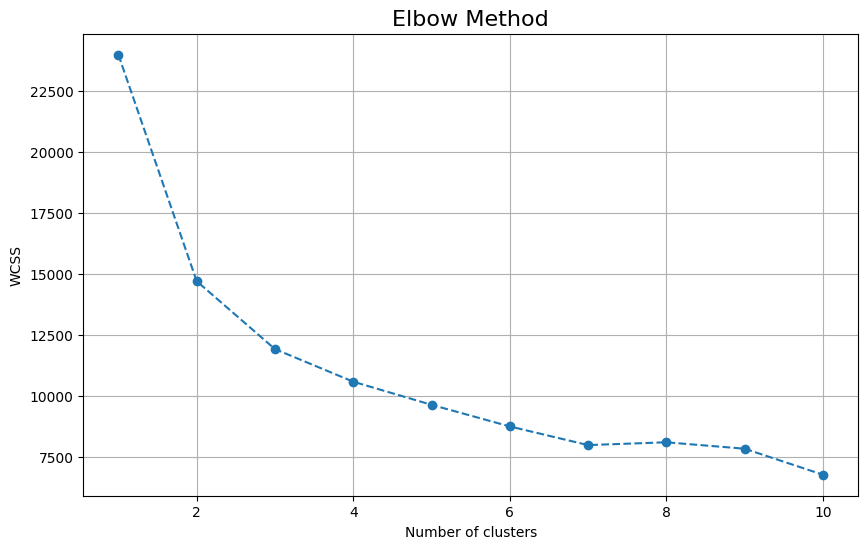

In [8]:
# Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares

# Test for a range of k (number of clusters)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


This step plots the "elbow curve" to help visually determine the optimal number of clusters by finding the point where the drop in WCSS becomes less steep.

# 6. Choose Optimal Clusters and Explain

### 💡 _We can observe from the Elbow plot that the curve starts to flatten around **K = 3**._

_Therefore, we choose **3 clusters** as the optimal number for K-means clustering._


# 7. Run K-Means Clustering

In [12]:
# Set the number of clusters (we chose 3 from the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and assign cluster labels
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)


This step fits the K-Means model to the standardized data using the optimal number of clusters (3), and assigns a cluster label to each data point. We store these labels in a new column called Cluster for visualization and analysis.

# 8. Visualize the Clusters

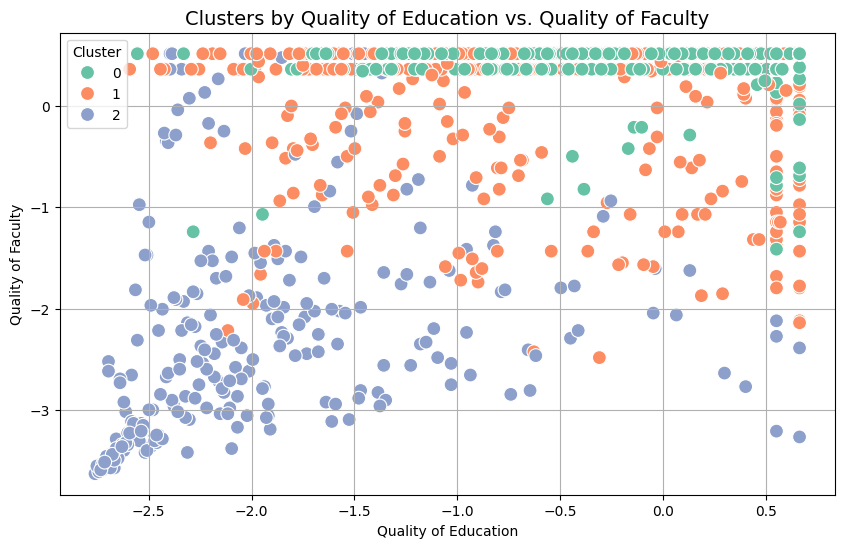

In [13]:
# First, convert the scaled data back to a DataFrame for visualization
df_clustered = pd.DataFrame(df_scaled, columns=df_cleaned.columns)
df_clustered['Cluster'] = kmeans.labels_

# Basic scatter plot of two features colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_clustered['quality_of_education'],
    y=df_clustered['quality_of_faculty'],
    hue=df_clustered['Cluster'],
    palette='Set2',
    s=100
)
plt.title('Clusters by Quality of Education vs. Quality of Faculty', fontsize=14)
plt.xlabel('Quality of Education')
plt.ylabel('Quality of Faculty')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


This scatter plot helps visualize how the universities cluster based on education and faculty quality. Different colors represent different clusters. You can change the x and y variables to explore other patterns.

# 9. Analyze Descriptive Statistics by Cluster

In [14]:
# Add cluster labels to the original cleaned data
df_cleaned['Cluster'] = kmeans.labels_

# Group by clusters and get descriptive statistics
cluster_summary = df_cleaned.groupby('Cluster').mean().round(2)
display(cluster_summary)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5848\3051290340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.labels_


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
Cluster,,,,,,,,,,,,
0,745.20,53.53,343.84,460.82,213.02,740.74,731.09,640.88,738.13,613.31,44.49,2014.51
1,320.44,36.32,299.58,350.98,201.02,318.93,335.07,316.33,314.83,385.48,46.57,2014.49
2,76.68,17.77,97.60,190.89,75.72,98.06,86.24,93.98,91.13,161.94,58.65,2014.50


# 10. Interpretation and Use in Analytics Pipeline

### 💡 Interpretation of Clusters

- **Cluster 0** may represent universities with strong faculty but moderate research output.
- **Cluster 1** could include elite universities excelling across all metrics.
- **Cluster 2** might capture institutions with lower scores in several areas.

These clusters can be used for:
- Benchmarking universities within similar performance bands.
- Creating targeted strategies for improvement.
- Supporting data-driven rankings or funding decisions.


These insights could guide policymakers or institutional leaders in identifying peer groups or areas needing development.

# 11. Export the Clustered Dataset to CSV

In [16]:
# Combine the cleaned data with cluster labels
final_df = df_cleaned.copy()
final_df['Cluster'] = kmeans.labels_

# Save the clustered data to a new CSV file
final_df.to_csv("clustered_cwur_data.csv", index=False)
print("✅ Clustered dataset saved as 'clustered_cwur_data.csv'")


✅ Clustered dataset saved as 'clustered_cwur_data.csv'


We are now exporting the cleaned dataset (with 2000 rows) along with the cluster labels. This avoids the mismatch error and ensures the saved CSV file contains consistent and useful data